In [ ]:
# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests as rq

In [3]:
df=pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)

# Save HTML to file

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [5]:
image_df = pd.read_csv("image-predictions.tsv",sep="\t")

In [6]:
image_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

Directions for accessing the Twitter data without actually creating a Twitter account:
At the bottom of this page you can find two files you can download:

twitter_api.py: This is the Twitter API code to gather some of the required data for the project. Read the code and comments, understand how the code works, then copy and paste it into your notebook.
tweet_json.txt: This is the resulting data from twitter_api.py. You can proceed with the following part of "Gathering Data for this Project" on the Project Details page: "Then read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count."

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = key["API Key"]
consumer_secret = key["API Key Secret"]
access_token = key["Access Token"]
access_secret = key["Access Token Secret"]

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'key' is not defined

In [8]:
import requests
import json
import os
df_list = []
with open('tweet_json.txt', 'r', encoding='utf-8') as json_file:
    for line in json_file:
        data = json.loads(line)
        df_list.append(data)

In [9]:
# Convert the list to a dataframe and seperate out the variables of interest
df_j = pd.DataFrame(df_list, columns = df_list[0].keys())
tweet_count = df_j[['id', 'retweet_count', 'favorite_count']]

In [10]:
# Check if the dataframe is correctly extracted
tweet_count.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
df.head(2).T

,0,1
tweet_id,892420643555336193,892177421306343426
in_reply_to_status_id,NaN,NaN
in_reply_to_user_id,NaN,NaN
timestamp,2017-08-01 16:23:56 +0000,2017-08-01 00:17:27 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....
retweeted_status_id,NaN,NaN
retweeted_status_user_id,NaN,NaN
retweeted_status_timestamp,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892177421...


Check for the columns and data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Check for outliers in numeric fields, we noted zeros in numerator and denometor

In [13]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
df_zeronum=df.query("rating_numerator<1")

In [15]:
df_zeronum

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [16]:
df_zerodenom=df.query("rating_denominator<1")

In [17]:
df_zerodenom

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [18]:
df['name'].unique()


array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [19]:
df_oddname=df.query("name in ('the','a','unacceptable','life','by','old','his','my','an')")

In [20]:
df_oddname

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773...,10,10,his,doggo,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None


In [21]:
df_none=df.query("doggo =='None' & floofer == 'None' & pupper=='None' & puppo =='None' ")
df_none

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


In [22]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_df[image_df['jpg_url'].duplicated() == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


### Quality issues
1.We noted from twitter archive timestamp has been stored as a string instead of date 

2.We note that 2 tweet id have zero value for the rating numerator i.e. tweet id 835152434251116546 and 746906459439529985

3.We note that one tweet id has a zero value for the rating denominator _ we cleaned this by removing all with a denominator not 10

4.We note that the names used in twitter archive dataset could be typos as evidence by data frama df_oddname where we see names such as the,a,unacceptable and life._ we left this dataset as is

5.We have 1976 entries without any dog style._we left this dataset as is.

6.We have 66 duplicates jpg_url without any duplicate tweet id in the image predictor dataset._we left this dataset as is.

7.There are different number of records in each dataset

8.doggo, floofer, pupper, puppo columns contain 'None' value where NaN should be used.
9. Expanded url has null datasets 

### Tidiness issues
1.doggo, floofer, pupper, puppo columns are all about the same things, a kind of dog personality.

2.df (twitter archive dataset) There are retweets and replies included in the dataset (represented by redundant columns)


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
df_arch=df.copy()
df_pred=image_df.copy()
df_api=tweet_count.copy()

### Issue #1: Time stamp data type

#### Define:
Changing time stamp data type from object to date

#### Code

In [25]:
df_arch["timestamp"] = pd.to_datetime(df_arch["timestamp"])

#### Test

In [26]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2:Remove extra columns and retweet dataset

#### Define 
Remove retweets then extra columns that we do not require for our analysis

#### Code

In [27]:
df_arch=df_arch[df_arch.in_reply_to_status_id.isnull()]

In [28]:
df_arch=df_arch[df_arch.in_reply_to_user_id.isnull()]

#### Test

In [29]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: datetime64[ns](1),

In [30]:
df_arch.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [31]:
df_arch.filter(['tweet_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'])

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Issue #3:Remove None and replace with nan for null values

In [32]:
# Function to convert None to NaN
def none_to_nan(item):
    if item == 'None':
        item = np.NaN
    return item

In [33]:
df_arch['name'] = [none_to_nan(item) for item in df_arch['name']]
df_arch['doggo'] = [none_to_nan(item) for item in df_arch['doggo']]
df_arch['floofer'] = [none_to_nan(item) for item in df_arch['floofer']]
df_arch['pupper'] = [none_to_nan(item) for item in df_arch['pupper']]
df_arch['puppo'] = [none_to_nan(item) for item in df_arch['puppo']]

In [34]:
# Check NaNs
df_arch[['doggo', 'floofer', 'pupper', 'puppo']].head(10)

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,doggo,NaN,NaN,NaN


### Issue #4:Merge dg styles into one column

In [35]:
# merge style data into one column
df_arch['dog_style'] = df_arch.doggo.fillna(df_arch.floofer.fillna(df_arch.pupper.fillna(df_arch.puppo)))

In [36]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          1610 non-null object
doggo                         93 non-null object
floofer                       10 non-null object
pupper                        253 non-null object
puppo                         29 non-null object
dog_style                     372

In [37]:
df_arch=df_arch.filter(['tweet_id', 'timestamp',
       'source','expanded_urls', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_style'])

### Issue #5:clean dataset under source

In [38]:
df_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2143
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [39]:
df_arch['source'] = df_arch['source'].str.extract('^<a.+>(.+)</a>$')

In [40]:
df_arch.source.value_counts()

Twitter for iPhone     2143
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #6:Remove rows with denominator greater than 10

In [41]:
# denominators greater than 10
df_arch.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        1
11        3
10     2260
7         1
2         1
Name: rating_denominator, dtype: int64

In [42]:
df_arch.query("rating_denominator != 10")

,tweet_id,timestamp,source,expanded_urls,text,rating_numerator,rating_denominator,name,dog_style
433,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,https://twitter.com/dog_rates/status/820690176...,The floofs have been released I repeat the flo...,84,70,NaN,NaN
516,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,"https://www.gofundme.com/sams-smile,https://tw...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,NaN
784,775096608509886464,2016-09-11 22:20:06,Twitter for iPhone,https://twitter.com/dog_rates/status/740373189...,"RT @dog_rates: After so many requests, this is...",9,11,NaN,NaN
902,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,https://twitter.com/dog_rates/status/758467244...,Why does this never happen at my front door......,165,150,NaN,NaN
1068,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,https://twitter.com/dog_rates/status/740373189...,"After so many requests, this is Bretagne. She ...",9,11,NaN,NaN
1120,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,https://twitter.com/dog_rates/status/731156023...,Say hello to this unbelievably well behaved sq...,204,170,this,NaN
1165,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,https://twitter.com/dog_rates/status/722974582...,Happy 4/20 from the squad! 13/10 for all https...,4,20,NaN,NaN
1202,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,https://twitter.com/dog_rates/status/716439118...,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,NaN
1228,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,https://twitter.com/dog_rates/status/713900603...,Happy Saturday here's 9 puppers on a bench. 99...,99,90,NaN,NaN
1254,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,https://twitter.com/dog_rates/status/710658690...,Here's a brigade of puppers. All look very pre...,80,80,NaN,NaN


In [43]:
df_arch = df_arch[df_arch.rating_denominator == 10]

## Removing of null exanded_urls

In [44]:
df_arch = df_arch[df_arch.expanded_urls.notnull()]

In [45]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2256 non-null int64
timestamp             2256 non-null datetime64[ns]
source                2256 non-null object
expanded_urls         2256 non-null object
text                  2256 non-null object
rating_numerator      2256 non-null int64
rating_denominator    2256 non-null int64
name                  1604 non-null object
dog_style             371 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 176.2+ KB


In [46]:
assert df_arch['expanded_urls'].isna().sum() == 0

In [47]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [156]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [157]:
df_api.rename(columns = {'id':'tweet_id'}, inplace = True)

In [158]:
df_arch = pd.merge(df_arch, df_api, 
                         on = 'tweet_id', how = 'left')

In [159]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2255
Data columns (total 11 columns):
tweet_id              2256 non-null int64
timestamp             2256 non-null datetime64[ns]
source                2256 non-null object
expanded_urls         2256 non-null object
text                  2256 non-null object
rating_numerator      2256 non-null int64
rating_denominator    2256 non-null int64
name                  1604 non-null object
dog_style             371 non-null object
retweet_count         2254 non-null float64
favorite_count        2254 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 211.5+ KB


In [160]:
#define conditions
conditions = [
    (df_pred['p1_conf'] > df_pred['p2_conf']) & (df_pred['p1_conf'] > df_pred['p3_conf']),
     (df_pred['p2_conf'] > df_pred['p1_conf']) & (df_pred['p2_conf'] > df_pred['p3_conf']),
     (df_pred['p3_conf'] > df_pred['p1_conf']) & (df_pred['p3_conf'] > df_pred['p2_conf'])
     #(df_pred['p1_dog'] == 'False') & (df_pred['p2_dog']  == 'False') & (df_pred['p3_dog']  == 'False')
    
]

#define results
results = [df_pred['p1'], df_pred['p2'], df_pred['p3']]

#create new column based on conditions 
df_pred['classification'] = np.select(conditions, results)

In [161]:
#define conditions
conditions = [
    (df_pred['p1_conf'] > df_pred['p2_conf']) & (df_pred['p1_conf'] > df_pred['p3_conf']),
     (df_pred['p2_conf'] > df_pred['p1_conf']) & (df_pred['p2_conf'] > df_pred['p3_conf']),
     (df_pred['p3_conf'] > df_pred['p1_conf']) & (df_pred['p3_conf'] > df_pred['p2_conf'])
     #(df_pred['p1_dog'] == 'False') & (df_pred['p2_dog']  == 'False') & (df_pred['p3_dog']  == 'False')
    
]

#define results
results = [df_pred['p1_conf'], df_pred['p2_conf'], df_pred['p3_conf']]

#create new column based on conditions 
df_pred['concidence'] = np.select(conditions, results)

In [162]:
df_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,classification,concidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [163]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id          2075 non-null int64
jpg_url           2075 non-null object
img_num           2075 non-null int64
p1                2075 non-null object
p1_conf           2075 non-null float64
p1_dog            2075 non-null bool
p2                2075 non-null object
p2_conf           2075 non-null float64
p2_dog            2075 non-null bool
p3                2075 non-null object
p3_conf           2075 non-null float64
p3_dog            2075 non-null bool
classification    2075 non-null object
concidence        2075 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


In [164]:
df_pred=df_pred.filter(['tweet_id', 'jpg_url',
       'img_num', 'classification', 'concidence'])

In [165]:
df_arch = pd.merge(df_arch, df_pred,
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
df_arch.confidence = (df_pred.concidence * 100).astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [166]:
df_arch.head(5)

,tweet_id,timestamp,source,expanded_urls,text,rating_numerator,rating_denominator,name,dog_style,retweet_count,favorite_count,jpg_url,img_num,classification,concidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,https://twitter.com/dog_rates/status/891689557...,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,https://twitter.com/dog_rates/status/891327558...,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


In [167]:
df_arch['rating']=(df_arch['rating_numerator']/df_arch['rating_denominator']).astype(int)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [168]:
df_arch.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [169]:
df_analysis = df_arch.copy()
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 0 to 2034
Data columns (total 16 columns):
tweet_id              2035 non-null int64
timestamp             2035 non-null datetime64[ns]
source                2035 non-null object
expanded_urls         2035 non-null object
text                  2035 non-null object
rating_numerator      2035 non-null int64
rating_denominator    2035 non-null int64
name                  1490 non-null object
dog_style             318 non-null object
retweet_count         2033 non-null float64
favorite_count        2033 non-null float64
jpg_url               2035 non-null object
img_num               2035 non-null int64
classification        2035 non-null object
concidence            2035 non-null float64
rating                2035 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(7)
memory usage: 270.3+ KB


In [170]:
df_analysis[['rating', 'retweet_count', 'favorite_count', 'concidence']].describe()

,rating,retweet_count,favorite_count,concidence
count,2035.000000,2033.000000,2033.000000,2035.000000
mean,0.909582,2998.571077,8622.713724,0.594679
std,4.033254,5088.463527,12184.755819,0.271526
min,0.000000,16.000000,0.000000,0.044333
25%,1.000000,635.000000,1645.000000,0.363683
50%,1.000000,1418.000000,3891.000000,0.587830
75%,1.000000,3487.000000,11065.000000,0.844583
max,177.000000,79515.000000,132810.000000,1.000000


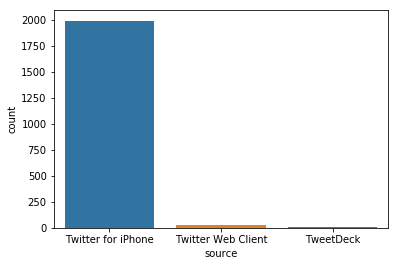

In [178]:
#df = sns.load_dataset("titanic")
import seaborn as sns
sns.countplot(x=df_arch["source"])


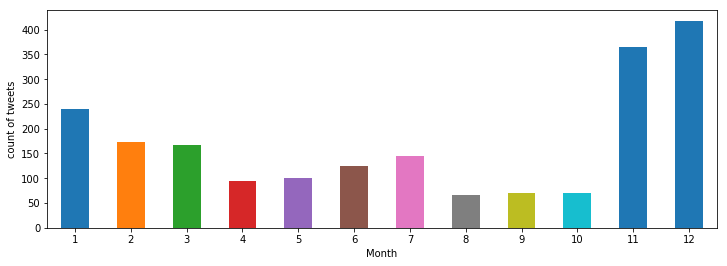

In [179]:
fig, axs = plt.subplots(figsize=(12, 4))

df_arch.groupby(df_arch["timestamp"].dt.month)["tweet_id"].count().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Month");  # custom x label using Matplotlib

plt.ylabel("count of tweets");

In [180]:
df_analysis.classification.value_counts()

golden_retriever             145
Labrador_retriever            96
Pembroke                      89
Chihuahua                     82
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    38
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
seat_belt                     22
miniature_pinscher            22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                19
Cardigan                      19
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
web_site                      18
Shih-Tzu                      17
Maltese_dog                   17
Lakeland_terrier              16
teddy                         16
Rottweiler                    16
Italian_greyhound             16
kuvasz                        15
          

In [181]:
df_analysis.dog_style.value_counts()

pupper     209
doggo       79
puppo       23
floofer      7
Name: dog_style, dtype: int64

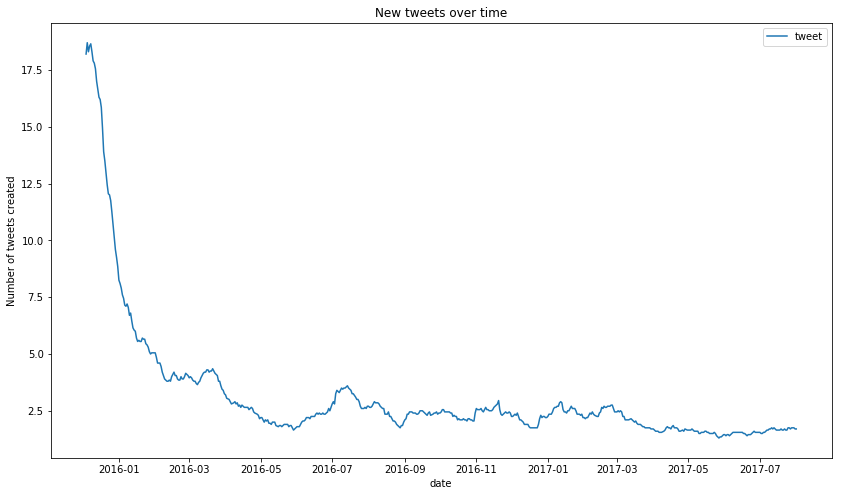

In [182]:
# Create two columns: 'date' to agregate 'datetime' 
# and 'tweet' to sum a number of tweets for a certain date
# by day
df_analysis['date'] = df_analysis['timestamp'].dt.date
# by week
#df_arch_clean['date'] = df_arch_clean['timestamp'].dt.week
# by month
#df_arch_clean['date'] = df_arch_clean['timestamp'].dt.month
df_analysis['tweet'] = 1

# Create a new dataframe with 2 columns, gruped by date
df1 = df_analysis[['date', 'tweet']].groupby(['date']).sum() # alternatively .count() could be used

# Use moving averages to smooth the line
df1['tweet'] = df1['tweet'].rolling(window=20).mean()

# Plot
df1.plot(figsize=(14, 8), title='New tweets over time')
plt.ylabel('Number of tweets created')
plt.show()

### Insights:
1. Most of the tweets source came from twitter for iphone accounting for over 2000 tweets

2.pupper is the favorite dog style with 209 dogs

3.golden_retriever  is the most common breed accounting for 145 dogs

4. Most tweets were done on a december

### Visualization

Please see above graphs on count plots per source, per month and also a line graph of new tweets over time